In [1]:
####################################################

####      Plotting domain averaged OLR for all simulations

####################################################

In [2]:
import numpy as np
import scipy as sc
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
import glob
from tqdm.notebook import tqdm

In [3]:
case=[
'SAM6108_RCE_MC_20221230_256x256',
'SAM6108_RCE_MC_20221230_256x256a',
'SAM6108_RCE_MC_20221230_256x256_DC',
'SAM6108_RCE_MC_20221230_256x256_DCa'
]

In [4]:
OLR_daily=[]

for i in range(len(case)):
    #print(case[i])
    path='/fs3/group/mullegrp/Bidyut_Goswami/sam_data/'+str(case[i])+'/OUT_'+str(case[i])+'/NETCDF_files/'
    f_in=''+str(path)+'RCE_MC_'+str(case[i])+'.nc'
#    print(f_in)
#   !ls -l $f_in
    fin = xr.open_dataset(f_in);
    LWd=fin['RADLWDN'];
    LWu=fin['RADLWUP'];
    PW=fin['PW'];
    OLR_z=LWu-LWd;
#    print(OLR_z);
    OLR=OLR_z.mean(dim='z');
    period=100
    OLRtmp=np.reshape(OLR.values,(int(OLR.shape[0]/period),period),order='F');
    OLR_d=np.mean(OLRtmp,0);
    OLR_daily.append(OLR_d);
    
OLR_daily=np.array(OLR_daily);

In [5]:
print(OLR_daily.shape)
daily_OLR=np.transpose(OLR_daily)

(4, 100)


In [7]:
%store -r psi01 #saved in Compute_psimax_CTRL.ipynb (Available in this Github repository)
%store -r psi02 #saved in Compute_psimax_CTRLsw.ipynb (NOT Available in this Github repository)
%store -r psi03 #saved in Compute_psimax_EXPT.ipynb (NOT Available in this Github repository)
%store -r psi04 #saved in Compute_psimax_EXPTsw.ipynb (NOT Available in this Github repository)

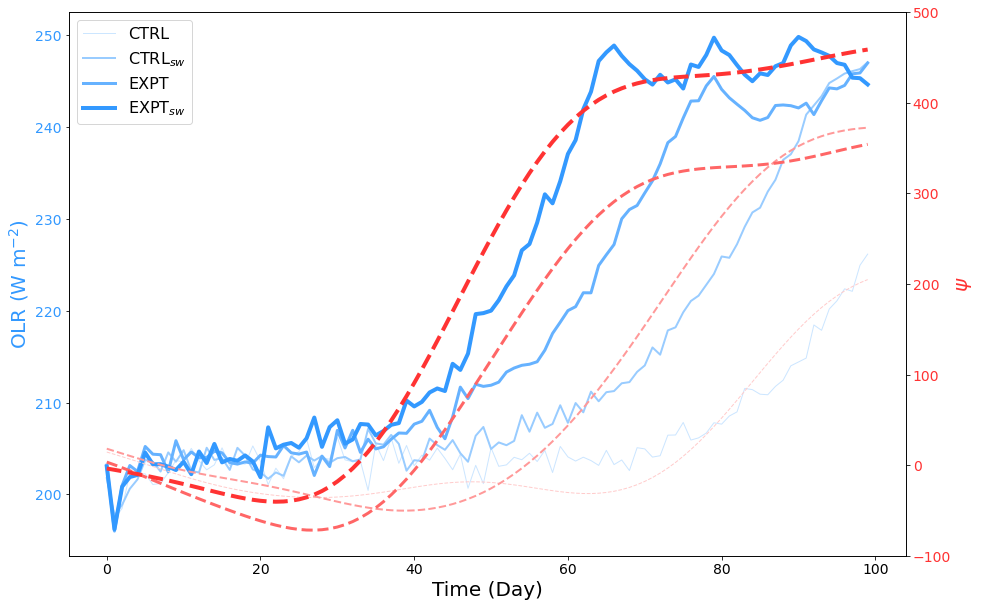

In [9]:
import matplotlib.pyplot as plt
import numpy as np


# Define colors
daily_OLR_colors = ['#cce6ff', '#99ccff', '#66b2ff', '#3399ff']  # Shades of blue
psi_colors = ['#ffcccc', '#ff9999', '#ff6666', '#ff3333']  # Shades of red

fig, ax1 = plt.subplots(figsize=(15, 10))

# Plot daily_OLR on the primary y-axis with increasing linewidth and shades of blue
ax1.plot(daily_OLR[:, 0], color=daily_OLR_colors[0], label='CTRL', linewidth=1)
ax1.plot(daily_OLR[:, 1], color=daily_OLR_colors[1], label='CTRL$_{sw}$', linewidth=2)
ax1.plot(daily_OLR[:, 2], color=daily_OLR_colors[2], label='EXPT', linewidth=3)
ax1.plot(daily_OLR[:, 3], color=daily_OLR_colors[3], label='EXPT$_{sw}$', linewidth=4)

ax1.legend(loc='upper left', fontsize=16)

ax1.tick_params(axis='x', labelcolor='k', labelsize=14)
ax1.set_xlabel('Time (Day)', fontsize=20)

ax1.tick_params(axis='y', labelcolor=daily_OLR_colors[3], labelsize=14)
ax1.set_ylabel('OLR (W m$^{-2}$)', color=daily_OLR_colors[3], fontsize=20)

# Create a secondary y-axis
ax2 = ax1.twinx()
ax2.set_ylim(-100, 500)

# Plot psi with dashed lines, shades of red, and increasing linewidth
ax2.plot(psi01, color=psi_colors[0], linestyle='dashed', linewidth=1)
ax2.plot(psi02, color=psi_colors[1], linestyle='dashed', linewidth=2)
ax2.plot(psi03, color=psi_colors[2], linestyle='dashed', linewidth=3)
ax2.plot(psi04, color=psi_colors[3], linestyle='dashed', linewidth=4)

ax2.tick_params(axis='y', labelcolor=psi_colors[3], labelsize=14)
ax2.set_ylabel('$\psi$', color=psi_colors[3], fontsize=20)

#ax2.legend(loc='lower right', fontsize=16)

#Saving figure
fig_directory='/fs3/home/bgoswami/work/20220913_SAM/SAM_Manuscript_01/Final_Figs'
figname="Figure_2"

plt.savefig(''+str(fig_directory)+'/'+str(figname)+'.svg', format="svg",transparent=True, dpi=1200)
!rsvg-convert -f pdf -o {fig_directory}/{figname}.pdf {fig_directory}/{figname}.svg
plt.show()

